# Chapter 4 - Statistics

In [2]:
import numpy as np
import scipy.stats
from scipy.stats import norm
from scipy.stats import f

import matplotlib.pyplot as plt
%matplotlib inline

## Normal distribution

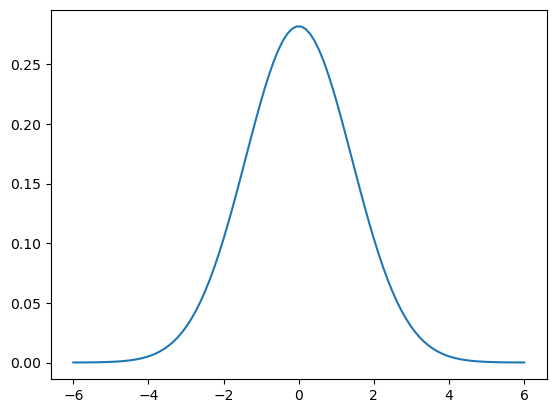

In [4]:
mu = 0                    # mean
variance = 2              # variance
sigma = np.sqrt(variance) # standard deviation"

# Create an array of 100 points linearly spaced between (mu - 3*variance) and (mu + 3*variance)
x = np.linspace(mu-3*variance, mu+3*variance, 100)

# Plot the probability density function (PDF) of the normal distribution with mean 'mu' and standard deviation 'sigma'
plt.plot(x, norm.pdf(x, mu, sigma));                  

## The Chi-Square distribution

The 𝜒2-distribution is used to model errors measured as sum of squares or the distribution of
the sample variance.

## The Fisher’s F-distribution

The 𝐹-distribution plays a central role in hypothesis testing answering the question: Are two
variances equals?, is the ratio or two errors significantly large ?

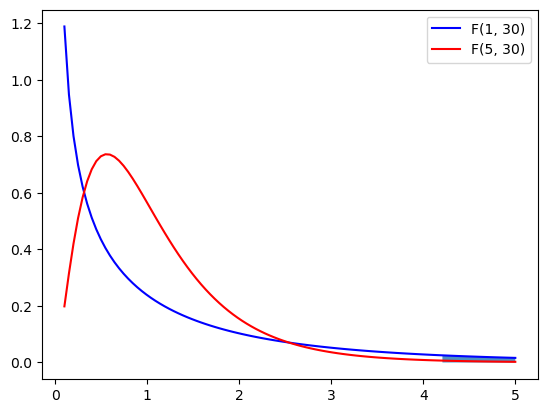

In [9]:
fvalues = np.linspace(.1, 5, 100)                                          # Create an array of 100 points linearly spaced between 0.1 and 5

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")           # Plot the PDF of the F-distribution with df1=1 and df2=30 in blue
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")           # Plot the PDF of the F-distribution with df1=5 and df2=30 in red
plt.legend()                                                               # Display the legend for the two plots

# cdf(x, df1, df2): Cumulative distribution function of F.
proba_at_f_inf_3 = f.cdf(3, 1, 30)                                         # Calculate P(F(1,30) < 3), the CDF of the F-distribution at x=3

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30)                                      # Calculate the F-value where P(F(1,30) < .95)

assert f.cdf(f_at_proba_inf_95, 1, 30) == .95                              # Verify that the CDF at the 95th percentile matches 0.95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30)                                          # Calculate P(F(1,30) > 3), the survival function for x=3

assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1                            # Verify that P(F(1,30) < 3) + P(F(1,30) > 3) equals 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]                   # Select values greater than the 95th percentile F-value
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),    # Fill the area under the PDF curve where P(F < 0.05)
alpha=.8, label="P < 0.05")                                                # Set transparency and label for the filled region
plt.show();                                                                # Show the plot

## The Student’s 𝑡-distribution
The distribution of the difference between an estimated parameter and its true (or assumed)value divided by the standard deviation of the estimated parameter (standard error) follow a𝑡-distribution. Is this parameters different from a given value?

## 4.1.3 Hypothesis Testing

Steps
1. Model the data
2. Fit: estimate the model parameters (frequency, mean, correlation, regression coeficient)
3. Compute a test statistic from model the parameters.
4. Formulate the null hypothesis: What would be the (distribution of the) test statistic if the
observations are the result of pure chance.
5. Compute the probability (𝑝-value) to obtain a larger value for the test statistic by chance
(under the null hypothesis).

#### Flip coin: Simplified example
Biased coin ? 2 heads have been found over 3 flips, is it coins biased ?
1. Model the data: number of heads follow a Binomial disctribution.
2. Compute model parameters: N=3, P = the frequency of number of heads over the number
of flip: 2/3.
3. Compute a test statistic, same as frequency.
4. Under the null hypothesis the distribution of the number of tail is:


| 1 | 2 | 3 | count #heads
|:--------:|:--------:|:--------:|:--------:|
|     |     |     |  0   |
|  H   |     |     |  1   |
|     |  H   |     |  1   |
|     |     |  H   |  1   |
|  H   |  H   |     |  2   |
|  H   |    |  H   |  2   |
|     |  H   |  H   |  2   |
|  H   |  H   |  H   |  3   |

8 possibles configurations, probabilities of differents values for 𝑝 are: 𝑥 measure the number of
success.

• 𝑃 (𝑥 = 0) = 1/8

• 𝑃 (𝑥 = 1) = 3/8

• 𝑃 (𝑥 = 2) = 3/8

• 𝑃 (𝑥 = 3) = 1/8

Compute the probability (𝑝-value) to observe a value larger or equal that 2 under the null
hypothesis ? 

This probability is the 𝑝-value:

    𝑃 (𝑥 ≥ 2|𝐻0) = 𝑃 (𝑥 = 2) + 𝑃 (𝑥 = 3) = 3/8 + 1/8 = 4/8 = 1/2

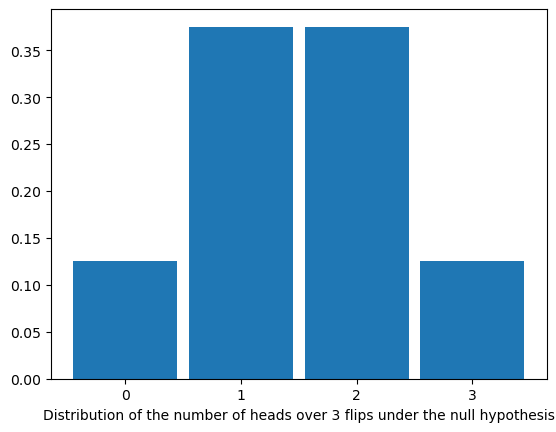

In [17]:
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)  # Create a bar chart with probabilities for each outcome (0 to 3 heads) with a bar width of 0.9
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])              # Set the x-axis tick marks to display the values 0, 1, 2, 3
plt.xlabel("Distribution of the number of heads over 3 flips under the null hypothesis")  # Label the x-axis
print()                                                          

#### Flip coin: Real Example

Biased coin ? 60 heads have been found over 100 flips, is it coins biased ?
1. Model the data: number of heads follow a Binomial disctribution.
2. Compute model parameters: N=100, P=60/100.
3. Compute a test statistic, same as frequency.
4. Compute a test statistic: 60/100.
5. Under the null hypothesis the distribution of the number of tail (𝑘) follow the binomial
6. 
distribution of parameters N=100, P=0.5:

    𝑃 𝑟(𝑋 = 𝑘|𝐻0) = 𝑃 𝑟(𝑋 = 𝑘|𝑛 = 100, 𝑝 = 0.5) = (︂100 𝑘 )︂0.5𝑘(1 − 0.5)(100−𝑘).
   
    𝑃 (𝑋 = 𝑘 ≥ 60|𝐻0) =
100
∑︁ 𝑘
=60
(︂100 𝑘 )︂0.5𝑘(1 − 0.5)(100−𝑘)
= 1 −
60
∑︁ 𝑘
=1
(︂100 𝑘 )︂0.5𝑘(1 − 0.5)(100−𝑘), the cumulative distribution function.

Pval: 0.0176


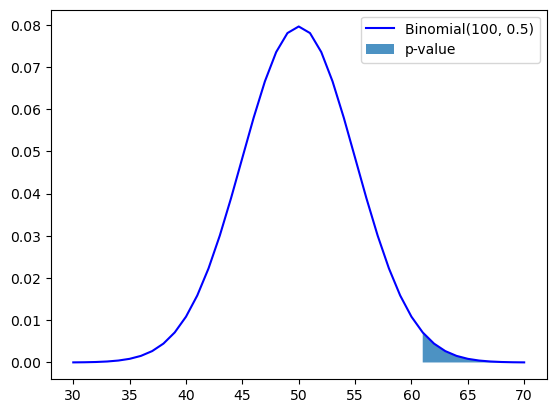

In [20]:
import scipy.stats                                                    
import matplotlib.pyplot as plt                                       

# tobs = 2.39687663116 # assume the t-value (commented out for now)

succes = np.linspace(30, 70, 41)                 # Create an array of 41 evenly spaced values between 30 and 70

plt.plot(succes, scipy.stats.binom.pmf(succes, 100, 0.5), 'b-', label="Binomial(100, 0.5)")  # Plot the Binomial PMF with n=100 and p=0.5

upper_succes_tvalues = succes[succes > 60]       # Get successes greater than 60 for the p-value calculation

# Highlight the region for p-value
plt.fill_between(upper_succes_tvalues, 0, scipy.stats.binom.pmf(upper_succes_tvalues, 100, 0.5), alpha=.8, label="p-value")  

_ = plt.legend()                                 # Add a legend to the plot

pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)   # Compute the p-value by subtracting the CDF at 60 from 1

print('Pval:', round(pval, 4))                   # Print the p-value rounded to 4 decimal places

    0.0176 < 0.05 (can reject the null hypothesis with 95% confidence). 

*This suggests that you have enough evidence to reject the null hypothesis, the coin is likely biased, and the observed 60 heads out of 100 flips is unlikely to have occurred by chance if the coin were fair.*

#### Random sampling of the Binomial distribution under the null hypothesis

In [23]:
sccess_h0 = scipy.stats.binom.rvs(100, 0.5, size=10000, random_state=4)  # Generate 10,000 random samples from Binomial(100, 0.5)
print(sccess_h0)                                                         # Print the generated samples
pval_rnd = np.sum(sccess_h0 >= 60) / (len(sccess_h0) + 1)                # Calculate p-value as the proportion of samples ≥ 60
print("P-value using Monte Carlo sampling of the Binomial distribution under H0=", pval_rnd)  # Print the calculated Monte Carlo p-value

[60 52 51 ... 45 51 44]
P-value using Monte Carlo sampling of the Binomial distribution under H0= 0.025897410258974102


## One sample 𝑡-test

The one-sample 𝑡-test is used to determine whether a sample comes from a population with a
specific mean. For example you want to test if the average height of a population is 1.75 𝑚.

In [26]:
x = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]  # Sample data (heights)

xbar = np.mean(x)  # Calculate the sample mean
mu0 = 1.75         # Hypothesized population mean

s = np.std(x, ddof=1)  # Calculate the sample standard deviation with Bessel's correction (ddof=1)
n = len(x)             # Determine the sample size

print('Sample Mean:', xbar)             # Print the sample mean
tobs = (xbar - mu0) / (s / np.sqrt(n))  # Calculate the t-value using the t-test formula
print('t_val:', tobs)                   # Print the calculated t-value

Sample Mean: 1.816
t_val: 2.3968766311585883


    H₀: μ = 1.75, where μ is the true population mean height.

    H₁: μ ≠ 1.75, suggesting that the population mean is different from 1.75 meters.

Decision Rule:

* if |tobs|> tcritical, reject null hypothesis
* if |tobs|=< tcritical, fail to reject null hypothesis

        |tobs| = 2.3968766311585883 > 2.262 (reject null hypothesis)

*There is significant evidence to conclude that the average height of the population is different from 1.75 meters.*

The `p-value` is the probability to observe a value 𝑡 more extreme than the observed
one 𝑡𝑜𝑏𝑠 under the null hypothesis 

    𝐻0: 𝑃 (𝑡 > 𝑡𝑜𝑏𝑠|𝐻0)

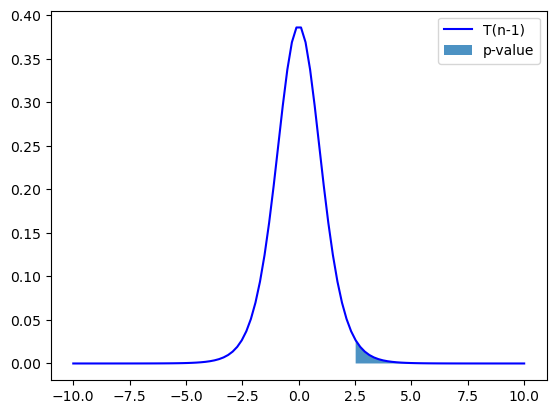

In [29]:
import scipy.stats as stats            # Import the 'scipy.stats' module for statistical functions
import matplotlib.pyplot as plt        # Import 'matplotlib.pyplot' for plotting

# tobs = 2.39687663116 # assume the t-value (commented out, but tobs is the observed t-value)

tvalues = np.linspace(-10, 10, 100)    # Generate 100 values linearly spaced between -10 and 10

plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")  # Plot the T-distribution PDF with n-1 degrees of freedom
upper_tval_tvalues = tvalues[tvalues > tobs]                        # Select t-values greater than the observed t-value (tobs)

# Fill the area above the observed t-value to calculate p-value
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8,   
label="p-value")     # Set transparency and label for the filled region

_ = plt.legend()     # Display the plot legend

## Testing pairwise associations

Univariate statistical analysis: explore association betweens pairs of variables.

<center>
    <img src="images/quantcate.png" width="900" />
</center>

### Pearson correlation test: test association between two quantitative variables
Test the correlation coefficient of two quantitative variables. The test calculates a Pearson correlation coefficient and the 𝑝-value for testing non-correlation.
Let 𝑥 and 𝑦 two quantitative variables, where 𝑛 samples were obeserved. The linear correlation
coeficient is defined as :

𝑟 =
∑︀𝑛 𝑖=1(𝑥𝑖 − 𝑥¯)(𝑦𝑖 − 𝑦¯)
√︀∑︀𝑛 𝑖=1(𝑥𝑖 − 𝑥¯)2√︀∑︀𝑛 𝑖=1(𝑦𝑖 − 𝑦¯)2 .

Under 𝐻0, the test statistic 𝑡 = √𝑛 − 2√1𝑟−𝑟2 follow Student distribution with 𝑛 − 2 degrees of
freedom.

In [34]:
import numpy as np
import scipy.stats as stats

n = 50                               # Set the sample size to 50
x = np.random.normal(size=n)         # Generate 'n' random values from a normal distribution for 'x'
y = 2 * x + np.random.normal(size=n) # Generate 'y' as a linear relationship with 'x' plus some random noise

cor, pval = stats.pearsonr(x, y)     # Calculate Pearson correlation coefficient and p-value between 'x' and 'y'

print(round(cor, 4), pval)           # Print the correlation rounded to 4 decimals and the p-value

0.8643 6.2393721333403655e-16


## Two sample (Student) 𝑡-test: compare two means

<center>
    <img src="images/twomeans.png" width="400" />
</center>

The two-sample 𝑡-test (Snedecor and Cochran, 1989) is used to determine if two population
means are equal. There are several variations on this test. If data are paired (e.g. 2 measures,
before and after treatment for each individual) use the one-sample 𝑡-test of the difference. The
variances of the two samples may be assumed to be equal (a.k.a. homoscedasticity) or unequal
(a.k.a. heteroscedasticity).

*The test assumes that the variances in the two groups are equal (equal_var=True).*

In [39]:
import scipy.stats as stats

height = np.array([1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,   # Define an array of heights for 10 males and 10 females
                   1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)                                          # Create an array of group labels: 10 "M" (male) and 10 "F" (female)

print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))   # Perform independent t-test assuming equal variances

TtestResult(statistic=3.5511519888466885, pvalue=0.00228208937112721, df=18.0)


#### The output of the t-test is:

    t-statistic: 3.5512

    p-value: 0.0023

    degrees of freedom (df): 18

#### Null Hypothesis (H₀):
The null hypothesis for a two-sample t-test is that the means of the two groups are equal:

H₀: μ₁ = μ₂, where μ₁ is the mean height of males and μ₂ is the mean height of females.
The alternative hypothesis (H₁) is:

H₁: μ₁ ≠ μ₂, meaning that the mean heights of the two groups are different.

#### Decision Rule:
The p-value helps us determine whether to reject the null hypothesis. Here’s how to interpret it:

#### Significance Level (α):
Commonly, we use a significance level of 0.05. This means that if the p-value is less than 0.05, we reject the null hypothesis.

Compare the p-value:
The p-value from the test is 0.0023, which is much smaller than the 0.05 threshold.

#### Conclusion:
Since the p-value (0.0023) is significantly smaller than the significance level (α=0.05), we can reject null hypothesis.

There is strong there is strong evidence that the mean height of males and females is significantly different.

### ANOVA 𝐹-test (quantitative ~ categorial (>=2 levels))

Analysis of variance (ANOVA) provides a statistical test of whether or not the means of several
(k) groups are equal, and therefore generalizes the 𝑡-test to more than two groups. ANOVAs
are useful for comparing (testing) three or more means (groups or variables) for statistical
significance. It is conceptually similar to multiple two-sample 𝑡-tests, but is less conservative.

• Test if any group is on average superior, or inferior, to the others versus the null hypothesis
that all four strategies yield the same mean response

• Detect any of several possible differences.

• The advantage of the ANOVA 𝐹-test is that we do not need to pre-specify which strategies
are to be compared, and we do not need to adjust for making multiple comparisons.

• The disadvantage of the ANOVA 𝐹-test is that if we reject the null hypothesis, we do not
know which strategies can be said to be significantly different from the others.

      Species  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0      setosa         5.006        3.428         1.462        0.246
1  versicolor         5.936        2.770         4.260        1.326
2   virginica         6.588        2.974         5.552        2.026

      Species  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0      setosa      0.352490     0.379064      0.173664     0.105386
1  versicolor      0.516171     0.313798      0.469911     0.197753
2   virginica      0.635880     0.322497      0.551895     0.274650



,sum_sq,df,F,PR(>F)
Species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


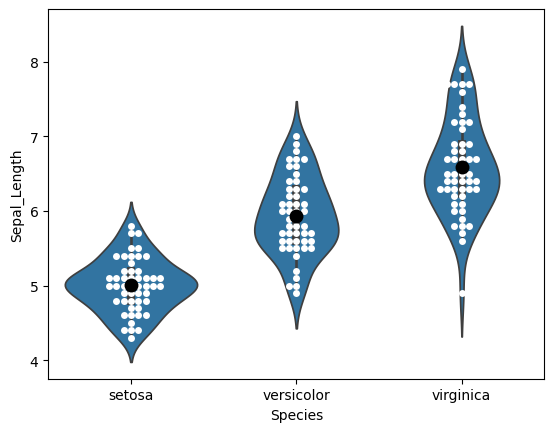

In [44]:
import seaborn as sns                                                
import statsmodels.api as sm                                      
from statsmodels.formula.api import ols                           

# Load iris dataset
iris = sm.datasets.get_rdataset("iris").data                      # Load the famous Iris dataset from statsmodels
iris.columns = [s.replace('.', '_') for s in iris.columns]        # Replace '.' with '_' in column names for easier reference

# Group means
means = iris.groupby("Species").mean().reset_index()              # Calculate the mean of each feature grouped by species
print(means)                                                      # Print the mean values for each species
print()

# Group standard deviations (equal variances?)
stds = iris.groupby("Species").std().reset_index()                # Calculate the standard deviation of each feature by species
print(stds)                                                       # Print the standard deviation values for each species
print()

# Plot groups
ax = sns.violinplot(x="Species", y="Sepal_Length", data=iris)     # Create a violin plot for Sepal Length by Species
ax = sns.swarmplot(x="Species", y="Sepal_Length", data=iris,      # Overlay a swarm plot to show individual data points (white dots)
color="white")
ax = sns.swarmplot(x="Species", y="Sepal_Length", color="black",  # Overlay the group means (black dots) on the plot
data=means, size=10)

# ANOVA
lm = ols('Sepal_Length ~ Species', data=iris).fit()               # Fit an ordinary least squares (OLS) model to the data
sm.stats.anova_lm(lm, typ=2)                                      # Perform Type 2 ANOVA to analyze the differences in Sepal Length across species

#### Explanation of the ANOVA table columns:

sum_sq:

* This is the sum of squares, which measures the total variation explained by each factor.
* The total variation due to Species is 63.21, while the unexplained variation (residuals) is 38.96.

df:

* Degrees of freedom. For the factor "Species", there are 2 degrees of freedom (since there are 3 groups, df=3−1=2).
* The residuals have 147 degrees of freedom, as there are 150 samples in total, and the model has estimated 3 means (one for each species).
                                                                                                                     
F:

* The F-statistic is a ratio of the variance explained by the model (between groups) to the variance not explained by the model (within groups).
* In this case, the F-value is 119.26, which is very high, indicating a large difference between the means of the species.
    
PR(>F):

* This is the p-value, or the probability of observing such a large F-statistic by chance under the null hypothesis (which assumes that the means of the species are equal).
* The p-value is 1.67e-31, which is extremely small (essentially 0).

#### Interpretation of ANOVA results:
* F-statistic: The very large F-value (119.26) indicates that the variation between the species' Sepal Lengths is much greater than the variation within each species.
* p-value: The p-value is extremely small (1.67e-31), much smaller than the typical significance level of 0.05. This means that the differences in Sepal Length across species are highly statistically significant.

#### Conclusion:
The ANOVA results suggest that there is strong evidence to reject the null hypothesis that the mean Sepal Lengths for the three species are equal. Therefore, you can conclude that the species differ significantly in their average Sepal Lengths.

## Chi-square, 𝜒2 (categorial ~ categorial)

Computes the chi-square, 𝜒2, statistic and 𝑝-value for the hypothesis test of independence of
frequencies in the observed contingency table (cross-table). The observed frequencies are tested
against an expected contingency table obtained by computing expected frequencies based on
the marginal sums under the assumption of independence.

#### Example: 20 participants: 10 exposed to some chemical product and 10 non exposed 
(exposed = 1 or 0). Among the 20 participants 10 had cancer 10 not (cancer = 1 or 0). 𝜒2 tests the association between those two variables.

In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Dataset:
# 20 samples:

# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)                       # Create an array representing exposure: first 10 are exposed (1), next 10 are not (0)

# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)               # Create an array representing cancer occurrence: 
                                                              # first 8 have cancer (1), next 10 do not (0), last 2 have cancer

# Create a cross-tabulation (contingency table) for exposure and cancer occurrence
crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'], 
colnames=['cancer'])
print("Observed table:")                                      # Print the observed cross-tabulation table
print("---------------")
print(crosstab)                                               # Display the contingency table
print()

# Perform chi-square test of independence on the contingency table
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)  
print("Statistics:")                                          # Print the test statistics
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))                  # Print the chi-square value and the p-value
print()
print("Expected table:")                                      # Print the expected values under the null hypothesis (independence)
print("---------------")
print(expected)                                               # Display the expected frequencies in the table if the variables were independent

Observed table:
---------------
cancer   0  1
exposed      
0        8  2
1        2  8

Statistics:
-----------
Chi2 = 5.000000, pval = 0.025347

Expected table:
---------------
[[5. 5.]
 [5. 5.]]


In [52]:
# Compute expected cross-table based on proportions
exposed_marg = crosstab.sum(axis=0)                      # Compute the marginal totals for exposure across columns (sum by cancer status)
exposed_freq = exposed_marg / exposed_marg.sum()         # Calculate the frequency (proportion) of exposure
cancer_marg = crosstab.sum(axis=1)                       # Compute the marginal totals for cancer occurrence across rows (sum by exposure status)
cancer_freq = cancer_marg / cancer_marg.sum()            # Calculate the frequency (proportion) of cancer occurrence

print('Exposed frequency? Yes: %.2f' % exposed_freq[0],  # Print the frequency of exposure for those with and without cancer
      'No: %.2f' % exposed_freq[1])
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],    # Print the frequency of cancer occurrence for those exposed and not exposed
      'No: %.2f' % cancer_freq[1])
print()

print('Expected frequencies:')                           # Compute and print the expected frequencies under the assumption of independence
print(np.outer(exposed_freq, cancer_freq))               # Use np.outer to compute the outer product of exposure and cancer frequencies
print()

print('Expected cross-table (frequencies * N): ')        # Print the expected cross-table by multiplying expected frequencies by the sample size
print(np.outer(exposed_freq, cancer_freq) * len(exposed))# Multiply the expected frequencies by the total number of observations (N = 20)

Exposed frequency? Yes: 0.50 No: 0.50
Cancer frequency? Yes: 0.50 No: 0.50

Expected frequencies:
[[0.25 0.25]
 [0.25 0.25]]

Expected cross-table (frequencies * N): 
[[5. 5.]
 [5. 5.]]


The chi-square test is used to determine if there is an association between exposure and cancer occurrence. Specifically, it tests the null hypothesis that the variables "exposure" and "cancer" are independent (i.e., there is no association between them).

The p-value is 0.0253, which is less than 0.05. This means that at a 5% significance level, the result is statistically significant.

Since the p-value is less than the typical threshold of 0.05, you reject the null hypothesis. **This suggests that there is a significant association between exposure and cancer occurrence.** In other words, the chance of observing such a difference between exposed and non-exposed groups purely by random chance is only about 2.5%, so we infer that exposure and cancer are likely related.

If exposure and cancer were independent, you would expect 5 individuals in each group (i.e., 5 exposed individuals with cancer, 5 exposed without cancer, 5 not exposed with cancer, and 5 not exposed without cancer). However, the observed table differs substantially from this, which leads to the significant chi-square statistic.

The observed counts show more individuals who are exposed and have cancer (8) than expected (5). Similarly, there are more non-exposed individuals without cancer (8) than expected (5). This deviation from the expected values is what drives the significant chi-square result.

#### Conclusion:
*Reject the null hypothesis*: The observed data provide evidence that there is a significant association between exposure and cancer occurrence.
The exposure status appears to affect the likelihood of having cancer, as the observed counts of individuals with cancer and exposure differ significantly from what would be expected under independence.

## Non-parametric test of pairwise associations

### Spearman rank-order correlation (quantitative ~ quantitative)
The Spearman correlation is a non-parametric measure of the monotonicity of the relationship
between two datasets.

When to use it? Observe the data distribution: - presence of outliers - the distribution of the
residuals is not Gaussian.

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as 𝑥 increases, so does 𝑦. Negative correlations imply that as 𝑥 increases, 𝑦 decreases.

Non-Parametric Spearman cor test, cor: 0.7110, pval: 0.0095

Parametric Pearson cor test: cor: 0.5263, pval: 0.0788


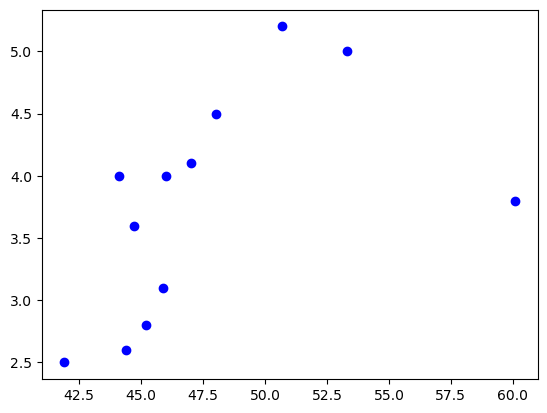

In [56]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([44.4, 45.9, 41.9, 53.3, 44.7, 44.1, 50.7, 45.2, 46, 47, 48, 60.1])
y = np.array([2.6, 3.1, 2.5, 5.0, 3.6, 4.0, 5.2, 2.8, 4, 4.1, 4.5, 3.8])

plt.plot(x, y, "bo")

# Non-Parametric Spearman
cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))
print()

# "Parametric Pearson cor test
cor, pval = stats.pearsonr(x, y)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

Spearman's correlation is a non-parametric measure of the rank correlation between two variables. It assesses how well the relationship between two variables can be described using a monotonic function (i.e., whether one variable tends to increase or decrease as the other increases).

It does not assume a linear relationship or normally distributed data, making it more robust to outliers and non-linear relationships.

    Non-Parametric Spearman cor test, cor: 0.7110, pval: 0.0095

A value of 0.7110 suggests that, as one variable increases, the other tends to increase as well, but the relationship does not have to be linear. Pval: 0.0095 < 0.05, we can reject the null hypothesis that there is no association between x and y. The evidence suggests a significant monotonic relationship between the two variables.

    Parametric Pearson cor test: cor: 0.5263, pval: 0.0788

A value of 0.5263 suggests that there is a tendency for y to increase as x increases, but the relationship is weaker compared to the Spearman correlation. Pearson's correlation specifically measures linear relationships, so a lower value here implies that the relationship between 
x and y might not be perfectly linear, or other factors like outliers could be influencing the result. The p-value is greater than 0.05, meaning the relationship is not statistically significant at the 5% level. You fail to reject the null hypothesis of no linear relationship between x and y. This suggests there is insufficient evidence to claim a significant linear association between the two variables.

**Spearman's test** captures monotonic relationships, so it can detect non-linear but consistently increasing or decreasing trends.
**Pearson's test** specifically detects linear relationships, which might be weakened by factors like non-linearity or outliers in the data.

#### Conclusion:

* The data show a significant monotonic relationship between x and y, as indicated by the Spearman correlation.

* However, the evidence for a linear relationship (as measured by Pearson's correlation) is weak and not statistically significant.

* Thus, we might conclude that the association between x and y is likely non-linear, but there is a clear increasing trend.

## Wilcoxon signed-rank test (quantitative ~ cte)

The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample
to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is
equivalent to one-sample test of the difference of paired samples.

It can be used as an alternative to the paired Student’s 𝑡-test, 𝑡-test for matched pairs, or the 𝑡-
test for dependent samples when the population cannot be assumed to be normally distributed.
When to use it? Observe the data distribution: - presence of outliers - the distribution of the
residuals is not Gaussian

It has a lower sensitivity compared to 𝑡-test. May be problematic to use when the sample size is
small.

Null hypothesis 𝐻0: difference between the pairs follows a symmetric distribution around zero.

In [60]:
import scipy.stats as stats

# Number of samples
n = 20  

# Business Volume at time 0 (baseline)
bv0 = np.random.normal(loc=3, scale=.1, size=n)              # Generate random values with mean=3, std=0.1

# Business Volume at time 1 (after intervention)
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)  # Slight increase from bv0, with noise

# Create an outlier in bv1
bv1[0] -= 10                                                 # Significantly reduce the first value of bv1 to create an outlier

# Paired t-test: Compares the means of two related samples (e.g., before and after)
print(stats.ttest_rel(bv0, bv1))                             # Perform a paired t-test and print the result
print()

# Wilcoxon signed-rank test: Non-parametric alternative, more robust to outliers
print(stats.wilcoxon(bv0, bv1))                              # Perform Wilcoxon signed-rank test and print the result

TtestResult(statistic=0.861563635364689, pvalue=0.3996708259838474, df=19)

WilcoxonResult(statistic=61.0, pvalue=0.10539817810058594)


`t-statistic`: 0.8246 — This measures the size of the difference between the means of the two related samples (business volumes at time 0 and time 1), relative to the variation in your data.

`p-value`: 0.4199 — The probability of observing such a difference by random chance if the null hypothesis (no difference) is true.

`df: 19` — The degrees of freedom, which is the number of paired observations minus one.

`Wilcoxon statistic`: 50.0 — This is the test statistic based on the ranks of the differences between paired samples.

`p-value`: 0.03999 — The probability of observing such a difference in ranks by random chance if the null hypothesis (no difference) is true. You can reject the null hypothesis, suggesting that there is a significant difference between the business volumes at time 0 and time 1. The Wilcoxon test is more robust to outliers, and it shows a significant difference despite the presence of the outlier you introduced in bv1.

The paired t-test did not find a significant difference (p-value = 0.4199), likely because it is sensitive to outliers. The extreme outlier in bv1[0] affects the result, leading to a higher p-value. The Wilcoxon test, however, is non-parametric and more robust to outliers. It found a significant difference (p-value = 0.03999), suggesting that the business volumes at time 0 and time 1 are indeed different when the ranks of the differences are considered.

#### Conclusion:

* The Wilcoxon test suggests that there is a significant difference between the business volumes at time 0 and time 1, despite the outlier in the data.
  
* The t-test fails to detect this difference, likely due to the outlier's impact.
  
* Given the outlier in the data, the Wilcoxon test may be a more reliable result in this scenario.

## Mann–Whitney 𝑈 test (quantitative ~ categorial (2 levels))

In statistics, the Mann–Whitney 𝑈 test (also called the Mann–Whitney–Wilcoxon, Wilcoxon
rank-sum test or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis
that two samples come from the same population against an alternative hypothesis, especially
that a particular population tends to have larger values than the other.
    
It can be applied on unknown distributions contrary to e.g. a 𝑡-test that has to be applied only
on normal distributions, and it is nearly as efficient as the 𝑡-test on normal distributions.

In [64]:
import scipy.stats as stats
import numpy as np

# Number of samples
n = 20

# Business Volume group 0 (random normal data around mean 1)
bv0 = np.random.normal(loc=1, scale=.1, size=n)

# Business Volume group 1 (random normal data around mean 1.2)
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)

# Create an outlier in bv1
bv1[0] -= 10  # Subtract 10 from the first element in bv1, introducing a significant outlier

# Two-sample t-test (assumes normal distribution and equal variance)
print(stats.ttest_ind(bv0, bv1))
print()

# Mann-Whitney U test (non-parametric alternative to the t-test)
print(stats.mannwhitneyu(bv0, bv1))

TtestResult(statistic=0.6249795810732898, pvalue=0.5357196147769462, df=38.0)

MannwhitneyuResult(statistic=52.0, pvalue=6.610446488702155e-05)


`t-statistic`: 0.5553 — This measures the difference between the means of the two groups (bv0 and bv1) relative to the variation within the groups. A small t-statistic suggests that the difference between the means is small relative to the variability in the data.
`p-value`: 0.5820 — The probability of observing such a difference in means by random chance, assuming that the null hypothesis (no difference) is true.
The p-value is greater than 0.05, which means the result is not statistically significant. You fail to reject the null hypothesis, which suggests that there is no evidence of a significant difference in the means of the two groups (bv0 and bv1). This result could be influenced by the outlier you introduced in bv1, which can make the t-test less reliable.

`U-statistic`: 48.0 — This is the test statistic from the Mann-Whitney U test, which reflects the rank differences between the two groups. Lower values indicate more substantial rank differences between the two groups.
`p-value`: 4.17e-05 (or 0.0000417) — The probability of observing such rank differences by random chance if the null hypothesis (no difference) is true.
The p-value is much less than 0.05, which means the result is statistically significant. You can reject the null hypothesis, indicating that there is a significant difference in the distributions of the two groups. The Mann-Whitney U test is non-parametric and robust to outliers, so this significant result suggests that, despite the outlier, there is a genuine difference between the groups.


#### Comparison of the Results:
`Two-sample t-test`:
*    The test did not find a significant difference between the means of the two groups (p-value = 0.5820). This could be due to the fact that the t-test is sensitive to outliers, and the extreme outlier in bv1 likely distorted the results.

`Mann-Whitney U test`:
*    The test found a highly significant difference (p-value = 0.0000417) between the distributions of the two groups. The Mann-Whitney U test is more robust to outliers, so it was able to detect a difference in the data, even with the outlier.

#### Conclusion:

* The two-sample t-test failed to detect a significant difference, possibly due to the influence of the outlier.

* The Mann-Whitney U test, being more resistant to outliers and not assuming a normal distribution, found a significant difference between the distributions of the two groups.

* Given the outlier in bv1, the Mann-Whitney U test provides a more reliable result, suggesting that the two groups have different distributions.

## Linear model

<center>
    <img src="images/linear.png" width="400" />
</center>

In [70]:
import pandas as pd

# Read the text file into a pandas DataFrame
df = pd.read_csv('data/salary_table.txt', delimiter=',')

# Show the first few rows of the DataFrame
df.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


In [71]:
salary = df[df.management == 'N']

salary.head()

,salary,experience,education,management
1,11608,1,Ph.D,N
3,11283,1,Master,N
4,11767,1,Ph.D,N
6,11772,2,Master,N
7,10535,2,Bachelor,N


y = 452.658228 x + 10785.911392, r: 0.965370, r-squared: 0.931939,

p-value: 0.000000, std_err: 24.970021

Regression line with the scatterplot:


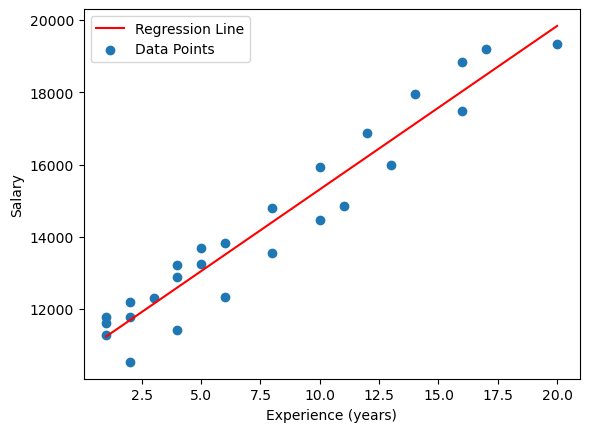

In [72]:
from scipy import stats
import numpy as np

# Extract salary and experience data from the DataFrame
y, x = salary['salary'], salary['experience']

# Perform linear regression using scipy's linregress function
beta, beta0, r_value, p_value, std_err = stats.linregress(x, y)

# Print the regression equation and statistics
print("y = %f x + %f, r: %f, r-squared: %f,\n\np-value: %f, std_err: %f"
    % (beta, beta0, r_value, r_value**2, p_value, std_err))
print()

# Plot the regression line with the scatterplot of the data
print("Regression line with the scatterplot:")
yhat = beta * x + beta0  # Calculate the predicted values (regression line)

# Plot the regression line and the scatter plot
plt.plot(x, yhat, 'r-', label='Regression Line')  # Plot the regression line in red
plt.scatter(x, y, label='Data Points')            # Plot the actual data points
plt.xlabel('Experience (years)')                  # Label the x-axis
plt.ylabel('Salary')                              # Label the y-axis
plt.legend()                                      # Show the legend
plt.show()                                        # Display the plot

Using seaborn


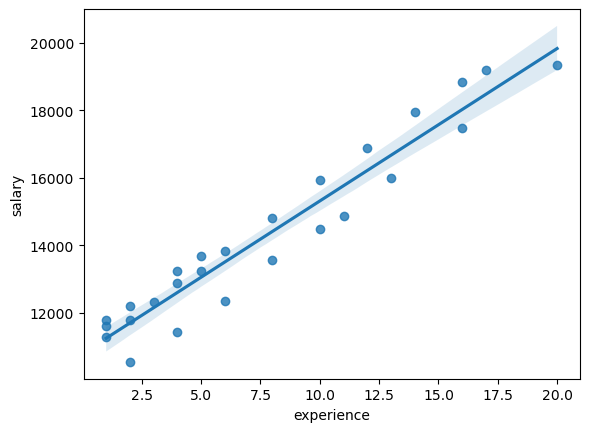

In [73]:
import seaborn as sns

print("Using seaborn")

sns.regplot(x="experience", y="salary", data=salary);

In [74]:
# Calculate residuals
res = y - (x * beta + beta0)  # Residuals: the difference between actual y values and predicted y values (yhat)

# Calculate the mean of y (average salary, for example)
y_mu = np.mean(y)  # Mean of the observed y values

# Calculate total sum of squares (SS_tot): total variance in y
ss_tot = np.sum((y - y_mu) ** 2)  # Sum of squared differences between observed y and the mean of y

# Calculate residual sum of squares (SS_res): unexplained variance by the model
ss_res = np.sum(res ** 2)  # Sum of squared differences between observed y and predicted y

# Calculate R-squared: proportion of variance explained by the model
print("r-squared: %.4f" % (1 - ss_res / ss_tot))  # R-squared value

r-squared: 0.9319


In [75]:
print("MSE: %.4f" % np.mean(res ** 2))      # Mean Squared Error
print("MAE: %.4f" % np.mean(np.abs(res)))   # Mean Absolute Error

MSE: 459923.0682
MAE: 602.2648


## Multiple Regression

In [77]:
import numpy as np
from scipy import linalg

# Set a random seed for reproducibility
np.random.seed(seed=42)

# Dataset
N, P = 50, 4  # N = number of samples (rows), P = number of features (columns)
X = np.random.normal(size=N * P).reshape((N, P))  # Generate random normally distributed data and reshape into N x P matrix

# Add an intercept term (a column of 1s) to the first column of X
X[:, 0] = 1
print(X[:5, :])  # Print the first 5 rows of X to inspect the matrix with intercept added

# True parameters (the "true" beta coefficients for the regression)
betastar = np.array([10, 1., .5, 0.1])  # True beta coefficients for the model

# Generate the target variable (y) using the true model with some random noise (e)
e = np.random.normal(size=N)  # Random noise (errors)
y = np.dot(X, betastar) + e   # Compute y = X * betastar + error (the true model with noise)

# Estimate the parameters (betahat) using the pseudoinverse of X
Xpinv = linalg.pinv(X)        # Use linalg.pinv() instead of pinv2()
betahat = np.dot(Xpinv, y)

# Print the estimated beta coefficients
print("\nEstimated beta coefficients:\n", betahat)

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]

Estimated beta coefficients:
 [10.14742501  0.57938106  0.51654653  0.17862194]


#### Interface with statsmodels

In [79]:
import statsmodels.api as sm

## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())

# prediction of new values
ypred = model.predict(X)

# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           0.000106
Time:                        11:23:49   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

#### Using R syntax in Python

In [81]:
import statsmodels.formula.api as smf

df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])
print(df.columns, df.shape)

# Build a model excluding the intercept, it is implicit
model = smf.ols("y~x1 + x2 + x3", df).fit()
print(model.summary())

Index(['inter', 'x1', 'x2', 'x3', 'y'], dtype='object') (50, 5)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           0.000106
Time:                        11:23:49   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

## Multiple Regression with categorical independent variables or factors: 
## Analysis of covariance (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression.
ANCOVA evaluates whether population means of a dependent variable (DV) are equal across
levels of a categorical independent variable (IV) often called a treatment, while statistically
controlling for the effects of other quantitative or continuous variables that are not of primary
interest, known as covariates (CV).

In [84]:
# Read the text file into a pandas DataFrame
df = pd.read_csv('data/salary_table.txt', delimiter=',')

# Show the first few rows of the DataFrame
df.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


Jarque-Bera normality test p-value: 0.04374


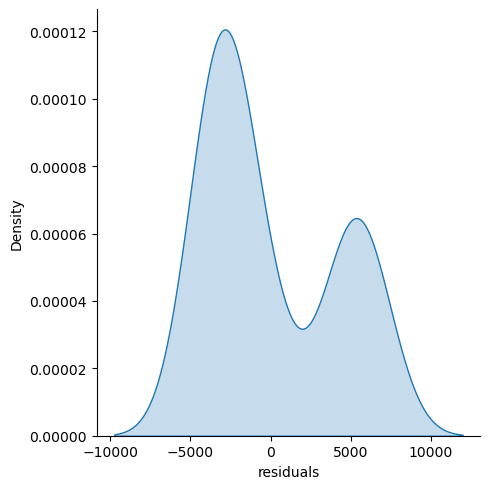

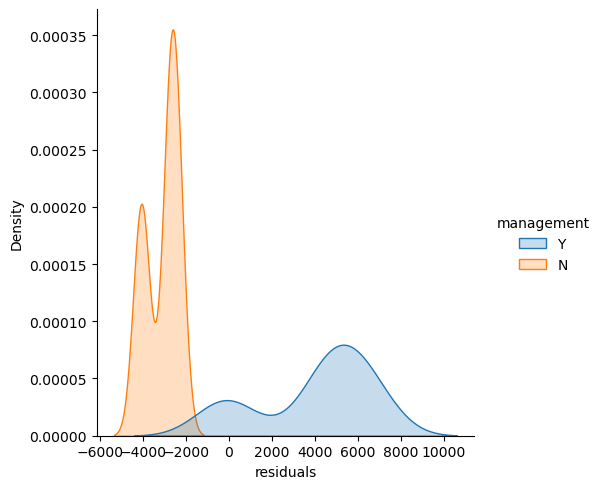

In [85]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the linear regression model
lm = smf.ols('salary ~ experience', df).fit()

# Add residuals to the DataFrame
df["residuals"] = lm.resid

# Perform Jarque-Bera normality test on residuals
print("Jarque-Bera normality test p-value: %.5f" % sms.jarque_bera(lm.resid)[1])

# Plot the distribution of residuals using KDE
sns.displot(df, x='residuals', kind='kde', fill=True)

# Plot the distribution of residuals with hue based on 'management'
sns.displot(df, x='residuals', kind='kde', hue='management', fill=True)

# Show the plot
plt.show();

Normality assumption of the residuals can be rejected (p-value < 0.05). There is an efect of the
“management” factor, take it into account.

The current model (salary ~ experience) does not adequately capture all the variation in the salary data. In particular, the management factor might need to be included as a predictor variable (e.g., salary ~ experience + management) to improve the model.

## One-way AN(C)OVA

• ANOVA: one categorical independent variable, i.e. one factor.

• ANCOVA: ANOVA with some covariates.

                  sum_sq    df           F        PR(>F)
management  5.755739e+08   1.0  183.593466  4.054116e-17
experience  3.334992e+08   1.0  106.377768  3.349662e-13
Residual    1.348070e+08  43.0         NaN           NaN
Jarque-Bera normality test p-value: 0.004



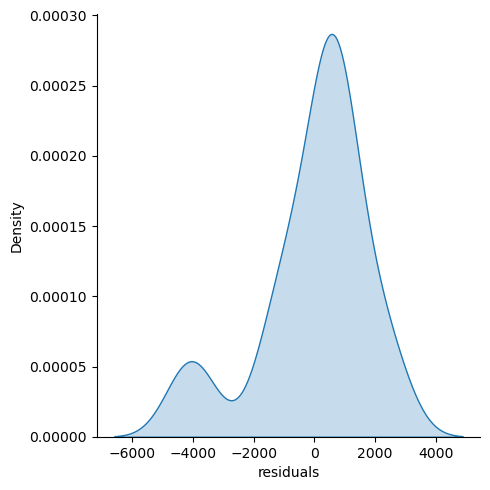

In [88]:
# Fit a linear model including management and experience
oneway = smf.ols('salary ~ management + experience', df).fit()

# Store the residuals in the DataFrame
df["residuals"] = oneway.resid

# Plot the residuals using a Kernel Density Estimate (KDE)
sns.displot(df, x='residuals', kind="kde", fill=True)

# Perform ANOVA to assess the effects of management and experience
print(sm.stats.anova_lm(oneway, typ=2))

# Perform Jarque-Bera test for normality on the residuals
print("Jarque-Bera normality test p-value: %.3f" % sms.jarque_bera(oneway.resid)[1])
print()

Distribution of residuals is still not normal but closer to normality. Both management and
experience are significantly associated with salary

## Two-way AN(C)OVA
Ancova with two categorical independent variables, i.e. two factors.

                  sum_sq    df           F        PR(>F)
education   9.152624e+07   2.0   43.351589  7.672450e-11
management  5.075724e+08   1.0  480.825394  2.901444e-24
experience  3.380979e+08   1.0  320.281524  5.546313e-21
Residual    4.328072e+07  41.0         NaN           NaN
Jarque-Bera normality test p-value 0.506



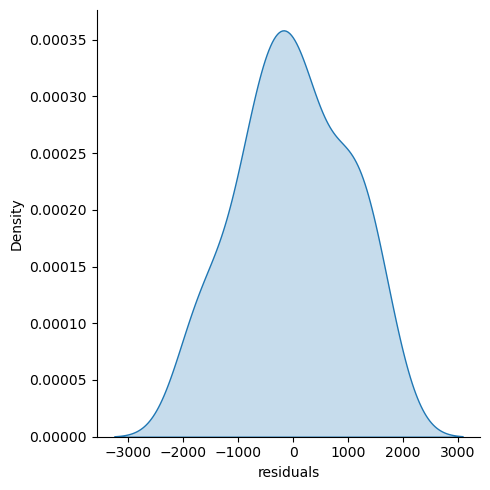

In [91]:
# Import required libraries
import statsmodels.formula.api as smf  # For OLS regression modeling
import seaborn as sns                  # For plotting
import statsmodels.stats.api as sms    # For Jarque-Bera test
import statsmodels.api as sm           # For ANOVA analysis

# Fit a linear regression model with salary as the dependent variable, and education, management, and experience as independent variables
twoway = smf.ols('salary ~ education + management + experience', df).fit()

# Add the residuals from the fitted model to the DataFrame for further analysis
df["residuals"] = twoway.resid

# Plot a Kernel Density Estimate (KDE) of the residuals to visually assess normality
sns.displot(df, x='residuals', kind="kde", fill=True)

# Perform ANOVA (Analysis of Variance) on the fitted model to check the significance of each predictor
# Type 2 ANOVA is used, which adjusts for the effects of all other variables in the model
print(sm.stats.anova_lm(twoway, typ=2))

# Perform the Jarque-Bera test to check whether the residuals are normally distributed
# Print the p-value from the test; if < 0.05, residuals are not normally distributed
print("Jarque-Bera normality test p-value %.3f\n" % sms.jarque_bera(twoway.resid)[1])

Normality assumtion cannot be rejected. Assume it. Education, management and experience
are significantly associated with salary

## Comparing two nested models

oneway is nested within twoway. Comparing two nested models tells us if the additional predictors (i.e. education) of the full model significantly decrease the residuals. Such comparison can
be done using an 𝐹-test on residuals:

In [95]:
# Perform F-test to compare the two models and print results elegantly
F, pval, df = twoway.compare_f_test(oneway)

# Print the results in a formatted string
print(f"F-statistic: {F:.3f}, p-value: {pval:.3e}, degrees of freedom: {df:.1f}")

F-statistic: 43.352, p-value: 7.672e-11, degrees of freedom: 2.0


### Factor coding

In [97]:
# Print the names of the parameters (the model's predictors)
print("Parameter Names (Predictors):")
print(twoway.model.data.param_names)
print()

# Print the first 10 rows of the exogenous data (predictor variables used in the model)
print("First 10 Rows of Exogenous Data (Predictors):")
print(twoway.model.data.exog[:10, :])

Parameter Names (Predictors):
['Intercept', 'education[T.Master]', 'education[T.Ph.D]', 'management[T.Y]', 'experience']

First 10 Rows of Exogenous Data (Predictors):
[[1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 2.]
 [1. 1. 0. 0. 2.]
 [1. 0. 0. 0. 2.]
 [1. 0. 1. 0. 2.]
 [1. 1. 0. 0. 3.]]


### Contrasts and post-hoc tests

In [99]:
# Perform a t-test for the specific contribution of 'experience' to the model
# The array [0, 0, 0, 0, 1] represents the hypothesis: we're testing if the coefficient for 'experience' (last entry) is significantly different from 0.
ttest_exp = twoway.t_test([0, 0, 0, 0, 1])

# Print the results of the t-test, including the p-value and t-statistic
# t_test() returns both p-value and t-statistic to evaluate the significance of 'experience'
print(ttest_exp)

# Alternatively, you can specify the hypothesis tests using a string format
# Here, we are testing if the coefficient for 'experience' is different from 0.
twoway.t_test('experience')

# Post-hoc test: Test if the salary for 'Master' education is different from 'Ph.D.'
# This compares the coefficients of 'education[T.Master]' and 'education[T.Ph.D]' to see if there is a significant difference.
# We are testing the hypothesis that the salary for 'Master' is equal to the salary for 'Ph.D.'
print(twoway.t_test('education[T.Master] = education[T.Ph.D]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           546.1840     30.519     17.896      0.000     484.549     607.819
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           147.8249    387.659      0.381      0.705    -635.069     930.719


### Multiple comparisons

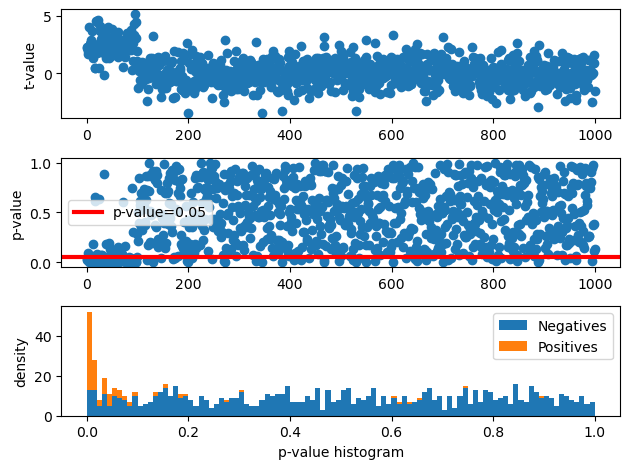

In [101]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(seed=42)

# Define the dataset size and structure
n_samples, n_features = 100, 1000  # 100 samples, 1000 features (variables)
n_info = int(n_features / 10)      # Number of features that contain actual group-related information

# Split the samples into two groups
n1, n2 = int(n_samples / 2), n_samples - int(n_samples / 2)  # Two groups of equal size (n1 = 50, n2 = 50)
snr = 0.5                                                    # Signal-to-noise ratio for the group effect

# Generate a random dataset with 100 samples and 1000 features
Y = np.random.randn(n_samples, n_features)  # Random normal data for Y (n_samples x n_features)

# Create a group array (grp), where the first half is "g1" and the second half is "g2"
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add a group effect to the first n_info features for group g1
Y[grp == "g1", :n_info] += snr  # Add snr to the first n_info features for group "g1"

# Initialize arrays to store t-values and p-values for each feature
tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)

# Perform t-tests for each feature to compare group "g1" and group "g2"
for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp == "g1", j], Y[grp == "g2", j], equal_var=True)

# Plot the results ----------------------------------------------------------
fig, axis = plt.subplots(3, 1)  # Create 3 vertically stacked subplots

# Plot t-values for each feature
axis[0].plot(range(n_features), tvals, 'o')  # Scatter plot of t-values
axis[0].set_ylabel("t-value")                # Label for the y-axis of the first plot

# Plot p-values for each feature
axis[1].plot(range(n_features), pvals, 'o')                              # Scatter plot of p-values
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")  # Add a horizontal line at p-value=0.05
axis[1].set_ylabel("p-value")                                            # Label for the y-axis of the second plot
axis[1].legend()                                                         # Add legend to the second plot

# Plot histogram of p-values for informative and non-informative features
axis[2].hist([pvals[n_info:], pvals[:n_info]],
             stacked=True, bins=100, label=["Negatives", "Positives"])  # Stacked histogram of p-values
axis[2].set_xlabel("p-value histogram")                                 # Label for the x-axis of the third plot
axis[2].set_ylabel("density")                                           # Label for the y-axis of the third plot
axis[2].legend()                                                        # Add legend to the third plot

# Adjust the layout so the plots don't overlap
plt.tight_layout()

Note that under the null hypothesis the distribution of the p-values is uniform.
Statistical measures:

    • True Positive (TP) equivalent to a hit. The test correctly concludes the presence of an effect.
    
    • True Negative (TN). The test correctly concludes the absence of an effect.
    
    • False Positive (FP) equivalent to a false alarm, Type I error. The test improperly concludes the presence of an effect. Thresholding at 𝑝-value < 0.05 leads to 47 FP.
    
    • False Negative (FN) equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [103]:
P, N = n_info, n_features - n_info # Positives, Negatives

TP = np.sum(pvals[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals[n_info: ] < 0.05) # False Positives


print(f"P: {P:.0f}, N: {N:.0f}\n")
print("No correction, FP: %i (expected: %.2f), TP: %i" % (FP, N * 0.05, TP))

P: 100, N: 900

No correction, FP: 47 (expected: 45.00), TP: 71


The term "No correction" refers to performing statistical tests (in this case, t-tests) without applying any adjustment for multiple comparisons. For 900 negative features (N = 900), you would expect approximately 900 * 0.05 = 45 false positives. 71 True Positives (TP): Out of the 100 true informative features, you correctly identified 71 as significant with p-values below 0.05.

### Bonferroni correction for multiple comparisons

The Bonferroni correction is based on the idea that if an experimenter is testing 𝑃 hypotheses, then one way of maintaining the familywise error rate (FWER) is to test each individual
hypothesis at a statistical significance level of 1/𝑃 times the desired maximum overall level.
So, if the desired significance level for the whole family of tests is 𝛼 (usually 0.05), then the
Bonferroni correction would test each individual hypothesis at a significance level of 𝛼/𝑃. For
example, if a trial is testing 𝑃 = 8 hypotheses with a desired 𝛼 = 0.05, then the Bonferroni
correction would test each individual hypothesis at 𝛼 = 0.05/8 = 0.00625.

In [107]:
import statsmodels.sandbox.stats.multicomp as multicomp

# Apply Bonferroni correction to the p-values
_, pvals_fwer, _, _ = multicomp.multipletests(pvals, alpha=0.05, method='bonferroni')

# True Positives (features from the first n_info features that are significant after correction)
TP = np.sum(pvals_fwer[:n_info] < 0.05)  # Number of true positives after Bonferroni correction

# False Positives (features from the remaining non-informative features that are significant after correction)
FP = np.sum(pvals_fwer[n_info:] < 0.05)  # Number of false positives after Bonferroni correction

# Print the number of false positives (FP) and true positives (TP) after the FWER correction
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

FWER correction, FP: 0, TP: 6


### The False discovery rate (FDR) correction for multiple comparisons

FDR-controlling procedures are designed to control the expected proportion of rejected null
hypotheses that were incorrect rejections (“false discoveries”). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least
one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased
rates of Type I errors.

In [110]:
import statsmodels.sandbox.stats.multicomp as multicomp

# Apply FDR correction (Benjamini-Hochberg method) to control for the False Discovery Rate
_, pvals_fdr, _, _ = multicomp.multipletests(pvals, alpha=0.05, method='fdr_bh')

# True Positives (features from the first n_info informative features that are significant after FDR correction)
TP = np.sum(pvals_fdr[:n_info] < 0.05)  # Number of true positives after FDR correction

# False Positives (features from the remaining non-informative features that are significant after FDR correction)
FP = np.sum(pvals_fdr[n_info:] < 0.05)  # Number of false positives after FDR correction

# Print the number of false positives (FP) and true positives (TP) after FDR correction
print("FDR correction, FP: %i, TP: %i" % (FP, TP))

FDR correction, FP: 3, TP: 20
